In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree

In [ ]:
url = 'https://drive.google.com/file/d/1pWQCsUPGerJE6hAY0FYmBoedfvz-ha-f/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event
0,1.0,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,...,Risk of Violence,1,Low,14/08/2013,07/07/2014,14/07/2014,0,0,327,0
1,2.0,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,...,Risk of Violence,1,Low,14/08/2013,07/07/2014,14/07/2014,0,334,961,0
2,3.0,michael ryan,michael,ryan,31/12/2014,Male,06/02/1985,31,25 - 45,Caucasian,...,Risk of Violence,2,Low,31/12/2014,30/12/2014,03/01/2015,0,3,457,0
3,4.0,kevon dixon,kevon,dixon,27/01/2013,Male,22/01/1982,34,25 - 45,African-American,...,Risk of Violence,1,Low,27/01/2013,26/01/2013,05/02/2013,0,9,159,1
4,5.0,ed philo,ed,philo,14/04/2013,Male,14/05/1991,24,Less than 25,African-American,...,Risk of Violence,3,Low,14/04/2013,16/06/2013,16/06/2013,4,0,63,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18311,NaN,alexsandra beauchamps,alexsandra,beauchamps,29/12/2014,Female,21/12/1984,31,25 - 45,African-American,...,Risk of Violence,4,Low,29/12/2014,28/12/2014,07/01/2015,5,9,459,0
18312,NaN,winston gregory,winston,gregory,14/01/2014,Male,01/10/1958,57,Greater than 45,Other,...,Risk of Violence,1,Low,14/01/2014,13/01/2014,14/01/2014,0,0,808,0
18313,NaN,farrah jean,farrah,jean,09/03/2014,Female,17/11/1982,33,25 - 45,African-American,...,Risk of Violence,2,Low,09/03/2014,08/03/2014,09/03/2014,3,0,754,0
18314,NaN,florencia sanmartin,florencia,sanmartin,30/06/2014,Female,18/12/1992,23,Less than 25,Hispanic,...,Risk of Violence,4,Low,30/06/2014,15/03/2015,15/03/2015,2,0,258,0


# **DATA CLEANING AND PREPROCESSING**

Text(0, 0.5, 'Number of Inmates')

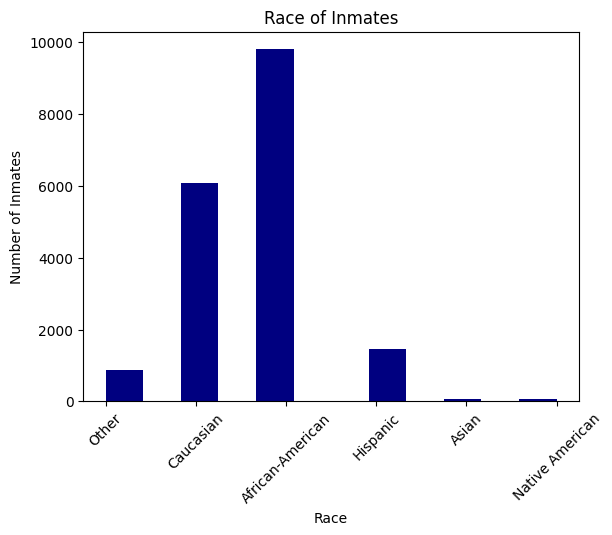

In [ ]:
plt.hist(df["race"], color = 'navy', bins = 12)
plt.xticks(rotation=45)
plt.title('Race of Inmates')
plt.xlabel('Race')
plt.ylabel('Number of Inmates')

Text(0, 0.5, 'Number of Inmates')

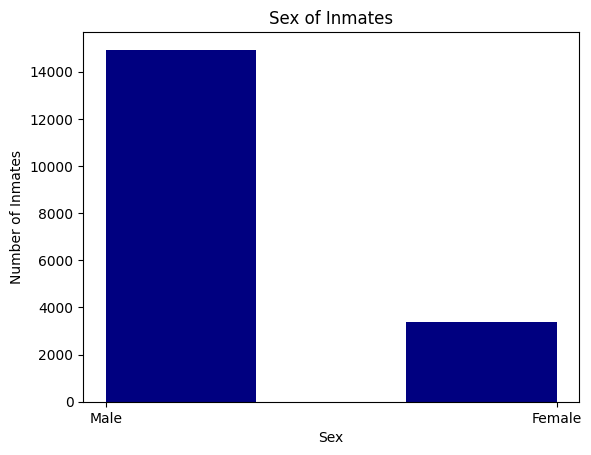

In [ ]:
plt.hist(df['sex'], bins = 3, color = 'Navy')
plt.title('Sex of Inmates')
plt.xlabel('Sex')
plt.ylabel('Number of Inmates')

Text(0, 0.5, 'Number of Inmates')

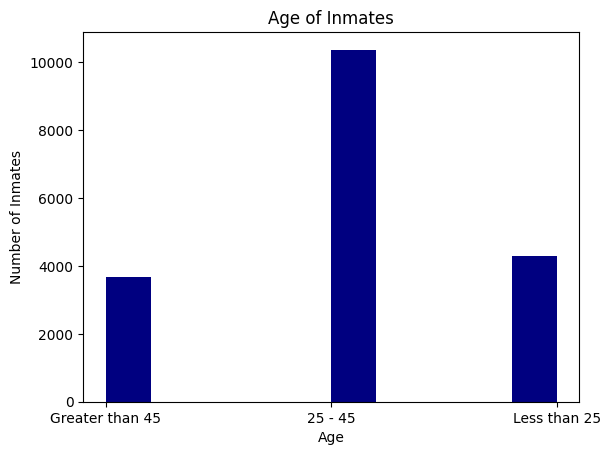

In [ ]:
plt.hist(df['age_cat'], color = 'Navy')
plt.title('Age of Inmates')
plt.xlabel('Age')
plt.ylabel('Number of Inmates')

In [ ]:
df.columns

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event'],
      dtype='object')

In [ ]:
# feature dictionary
# c before feature label represents COMPAS score?
# r before feature label represents offenders who did recidivate?
# vr before feature label represents offenders who did commit violent recidivism

feature_dict = {
    'days_b_screening_arrest': "?", #?
    'c_jail_in':"date/time put in jail",
    'c_jail_out': "date/time released from jail",
    'c_days_from_compas': "?", #?
    'c_charge_degree': " F1-F7: felonies, M1&M2: misdemeanors, NI0&TCX: traffic violations, M03&C03: county and municipal ordinance violations, CT: criminal traffic",
    'c_charge_desc': "description of specific charge (e.g. \"possession of cocaine\")",
    'is_recid': "whether or not recidivated",
    'type_of_assessment': "always \"risk of recidivism\"",
    'decile_score.1': "risk of recidivism from 1-10",
    'score_text': "low, medium, or high risk of recidivism",
    'screening_date': "date screened for risk",
    'event': "?"#?
}

In [ ]:
feature_dict

{'days_b_screening_arrest': '?',
 'c_jail_in': 'date/time put in jail',
 'c_jail_out': 'date/time released from jail',
 'c_days_from_compas': '?',
 'c_charge_degree': ' F1-F7: felonies, M1&M2: misdemeanors, NI0&TCX: traffic violations, M03&C03: county and municipal ordinance violations, CT: criminal traffic',
 'c_charge_desc': 'description of specific charge (e.g. "possession of cocaine")',
 'is_recid': 'whether or not recidivated',
 'type_of_assessment': 'always "risk of recidivism"',
 'decile_score.1': 'risk of recidivism from 1-10',
 'score_text': 'low, medium, or high risk of recidivism',
 'screening_date': 'date screened for risk',
 'event': '?'}

In [ ]:
df = df.drop_duplicates(['c_case_number']) #removing duplicate entries

In [ ]:
df = df.loc[:,['sex', 'age', 'race', 'priors_count', 'c_charge_degree', 'score_text', 'v_score_text', 'is_recid', 'is_violent_recid']] #new dataframe

In [ ]:
df.describe()

,age,priors_count,is_recid,is_violent_recid
count,10310.000000,10310.000000,10310.000000,10310.000000
mean,35.035015,3.286615,0.334821,0.079049
std,11.959540,4.759744,0.472361,0.269829
min,18.000000,0.000000,-1.000000,0.000000
25%,25.000000,0.000000,0.000000,0.000000
50%,32.000000,1.000000,0.000000,0.000000
75%,43.000000,4.000000,1.000000,0.000000
max,96.000000,43.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10310 entries, 0 to 18314
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sex               10310 non-null  object
 1   age               10310 non-null  int64 
 2   race              10310 non-null  object
 3   priors_count      10310 non-null  int64 
 4   c_charge_degree   10309 non-null  object
 5   score_text        10299 non-null  object
 6   v_score_text      10306 non-null  object
 7   is_recid          10310 non-null  int64 
 8   is_violent_recid  10310 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 805.5+ KB


In [ ]:
df.corr()

<ipython-input-127-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,priors_count,is_recid,is_violent_recid
age,1.000000,0.143345,-0.158760,-0.086888
priors_count,0.143345,1.000000,0.241635,0.089457
is_recid,-0.158760,0.241635,1.000000,0.412588
is_violent_recid,-0.086888,0.089457,0.412588,1.000000


array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='priors_count', ylabel='age'>,
        <Axes: xlabel='is_recid', ylabel='age'>,
        <Axes: xlabel='is_violent_recid', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='priors_count'>,
        <Axes: xlabel='priors_count', ylabel='priors_count'>,
        <Axes: xlabel='is_recid', ylabel='priors_count'>,
        <Axes: xlabel='is_violent_recid', ylabel='priors_count'>],
       [<Axes: xlabel='age', ylabel='is_recid'>,
        <Axes: xlabel='priors_count', ylabel='is_recid'>,
        <Axes: xlabel='is_recid', ylabel='is_recid'>,
        <Axes: xlabel='is_violent_recid', ylabel='is_recid'>],
       [<Axes: xlabel='age', ylabel='is_violent_recid'>,
        <Axes: xlabel='priors_count', ylabel='is_violent_recid'>,
        <Axes: xlabel='is_recid', ylabel='is_violent_recid'>,
        <Axes: xlabel='is_violent_recid', ylabel='is_violent_recid'>]],
      dtype=object)

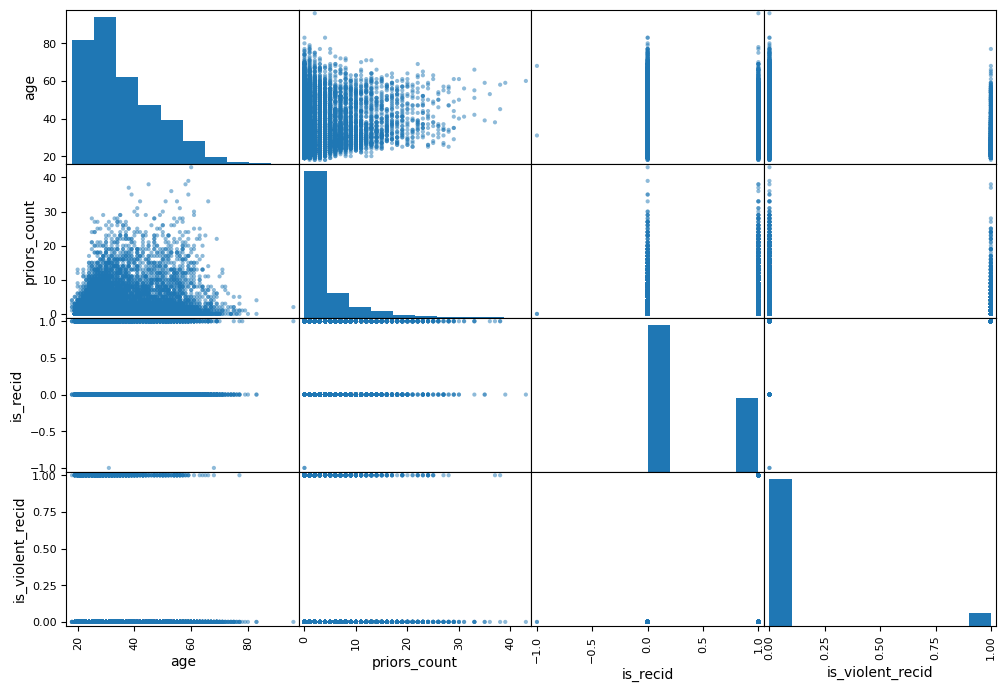

In [ ]:
scatter_matrix(df, figsize=(12, 8))

In [ ]:
df["is_recid"].value_counts()

 0    6854
 1    3454
-1       2
Name: is_recid, dtype: int64

In [ ]:
df = df[df['is_recid'] != -1] #drop data points with no data on recid
df

,sex,age,race,priors_count,c_charge_degree,score_text,v_score_text,is_recid,is_violent_recid
0,Male,69,Other,0,(F3),Low,Low,0,0
3,Male,34,African-American,0,(F3),Low,Low,1,1
4,Male,24,African-American,4,(F3),Low,Low,1,0
9,Male,23,African-American,1,(F3),High,Medium,0,0
10,Male,43,Other,2,(F7),Low,Low,0,0
...,...,...,...,...,...,...,...,...,...
18310,Male,23,African-American,0,(F3),Low,Medium,0,0
18311,Female,31,African-American,5,(M1),Medium,Low,0,0
18312,Male,57,Other,0,(F2),Low,Low,0,0
18313,Female,33,African-American,3,(M1),Low,Low,0,0


In [ ]:
df["is_violent_recid"].value_counts() #no need to modify

0    9493
1     815
Name: is_violent_recid, dtype: int64

In [ ]:
df['score_text'].value_counts()

Low       5737
Medium    2610
High      1950
Name: score_text, dtype: int64

In [ ]:
df["v_score_text"].value_counts()

Low       6963
Medium    2340
High      1001
Name: v_score_text, dtype: int64

In [ ]:
def text_to_recid(x):
  if x=='Low':
    return 0
  else:
    return 1

In [ ]:
df['score'] = df['score_text'].apply(text_to_recid)
df['v_score'] = df['v_score_text'].apply(text_to_recid)

In [ ]:
df = df.drop(["score_text", "v_score_text"], axis = 1)
df

,sex,age,race,priors_count,c_charge_degree,is_recid,is_violent_recid,score,v_score
0,Male,69,Other,0,(F3),0,0,0,0
3,Male,34,African-American,0,(F3),1,1,0,0
4,Male,24,African-American,4,(F3),1,0,0,0
9,Male,23,African-American,1,(F3),0,0,1,1
10,Male,43,Other,2,(F7),0,0,0,0
...,...,...,...,...,...,...,...,...,...
18310,Male,23,African-American,0,(F3),0,0,0,1
18311,Female,31,African-American,5,(M1),0,0,1,0
18312,Male,57,Other,0,(F2),0,0,0,0
18313,Female,33,African-American,3,(M1),0,0,0,0


In [ ]:
df = pd.get_dummies(df, columns = ['sex', 'race']) # One Hot Encode categorical variables

In [ ]:
df

,age,priors_count,c_charge_degree,is_recid,is_violent_recid,score,v_score,sex_Female,sex_Male,race_African-American,race_Asian,race_Caucasian,race_Hispanic,race_Native American,race_Other
0,69,0,(F3),0,0,0,0,0,1,0,0,0,0,0,1
3,34,0,(F3),1,1,0,0,0,1,1,0,0,0,0,0
4,24,4,(F3),1,0,0,0,0,1,1,0,0,0,0,0
9,23,1,(F3),0,0,1,1,0,1,1,0,0,0,0,0
10,43,2,(F7),0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18310,23,0,(F3),0,0,0,1,0,1,1,0,0,0,0,0
18311,31,5,(M1),0,0,1,0,1,0,1,0,0,0,0,0
18312,57,0,(F2),0,0,0,0,0,1,0,0,0,0,0,1
18313,33,3,(M1),0,0,0,0,1,0,1,0,0,0,0,0


In [ ]:
df['c_charge_degree'].value_counts()

(F3)     5558
(M1)     2645
(F2)      881
(M2)      800
(F1)      197
(F7)      121
(MO3)      78
(F6)       10
(NI0)       8
(F5)        6
(X)         1
(CT)        1
(TCX)       1
(CO3)       1
Name: c_charge_degree, dtype: int64

In [ ]:
df = df[df['c_charge_degree'] != '(X)'] #drop data points with no data on recid
df = df[df['c_charge_degree'] != '(CT)']
df = df[df['c_charge_degree'] != '(TCX)']
df = df[df['c_charge_degree'] != '(C03)']
df = df[df['c_charge_degree'] != '(NI0)']

def charge_to_int(i):
  match i:
    case '(MO3)':
      return 0
    case '(M1)':
      return 1
    case'(M2)':
      return 2
    case '(F1)':
      return 3
    case '(F2)':
      return 4
    case '(F3)':
      return 5
    case '(F4)':
      return 6
    case '(F5)':
      return 7
    case '(F6)':
      return 8
    case '(F7)':
      return 9
df['charge'] = df['c_charge_degree'].apply(charge_to_int)
df = df.drop(columns=['c_charge_degree'])
df

,age,priors_count,is_recid,is_violent_recid,score,v_score,sex_Female,sex_Male,race_African-American,race_Asian,race_Caucasian,race_Hispanic,race_Native American,race_Other,charge
0,69,0,0,0,0,0,0,1,0,0,0,0,0,1,5.0
3,34,0,1,1,0,0,0,1,1,0,0,0,0,0,5.0
4,24,4,1,0,0,0,0,1,1,0,0,0,0,0,5.0
9,23,1,0,0,1,1,0,1,1,0,0,0,0,0,5.0
10,43,2,0,0,0,0,0,1,0,0,0,0,0,1,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18310,23,0,0,0,0,1,0,1,1,0,0,0,0,0,5.0
18311,31,5,0,0,1,0,1,0,1,0,0,0,0,0,1.0
18312,57,0,0,0,0,0,0,1,0,0,0,0,0,1,4.0
18313,33,3,0,0,0,0,1,0,1,0,0,0,0,0,1.0


In [ ]:
# normalize age and priors_count using StandardScaler
scaler = StandardScaler()
# scaler = MinMaxScaler()
df['age_standardized'] = scaler.fit_transform(df[['age']])
df['priors_count_standardized'] = scaler.fit_transform(df[['priors_count']])
df['charge_standardized'] = scaler.fit_transform(df[['charge']])
df = df.drop(columns=['age', 'priors_count', 'charge'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10297 entries, 0 to 18314
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   is_recid                   10297 non-null  int64  
 1   is_violent_recid           10297 non-null  int64  
 2   score                      10297 non-null  int64  
 3   v_score                    10297 non-null  int64  
 4   sex_Female                 10297 non-null  uint8  
 5   sex_Male                   10297 non-null  uint8  
 6   race_African-American      10297 non-null  uint8  
 7   race_Asian                 10297 non-null  uint8  
 8   race_Caucasian             10297 non-null  uint8  
 9   race_Hispanic              10297 non-null  uint8  
 10  race_Native American       10297 non-null  uint8  
 11  race_Other                 10297 non-null  uint8  
 12  age_standardized           10297 non-null  float64
 13  priors_count_standardized  10297 non-null  flo

In [ ]:
df = df.dropna()
df

,is_recid,is_violent_recid,score,v_score,sex_Female,sex_Male,race_African-American,race_Asian,race_Caucasian,race_Hispanic,race_Native American,race_Other,age_standardized,priors_count_standardized,charge_standardized
0,0,0,0,0,0,1,0,0,0,0,0,1,2.842128,-0.690487,0.735126
3,1,1,0,0,0,1,1,0,0,0,0,0,-0.085766,-0.690487,0.735126
4,1,0,0,0,0,1,1,0,0,0,0,0,-0.922308,0.149584,0.735126
9,0,0,1,1,0,1,1,0,0,0,0,0,-1.005962,-0.480469,0.735126
10,0,0,0,0,0,1,0,0,0,0,0,1,0.667121,-0.270451,2.879428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18310,0,0,0,1,0,1,1,0,0,0,0,0,-1.005962,-0.690487,0.735126
18311,0,0,1,0,1,0,1,0,0,0,0,0,-0.336729,0.359602,-1.409177
18312,0,0,0,0,0,1,0,0,0,0,0,1,1.838279,-0.690487,0.199050
18313,0,0,0,0,1,0,1,0,0,0,0,0,-0.169421,-0.060433,-1.409177


Perform data visualization to get a general idea of the relationships between the features

array([[<Axes: xlabel='age_standardized', ylabel='age_standardized'>,
        <Axes: xlabel='priors_count_standardized', ylabel='age_standardized'>,
        <Axes: xlabel='charge_standardized', ylabel='age_standardized'>],
       [<Axes: xlabel='age_standardized', ylabel='priors_count_standardized'>,
        <Axes: xlabel='priors_count_standardized', ylabel='priors_count_standardized'>,
        <Axes: xlabel='charge_standardized', ylabel='priors_count_standardized'>],
       [<Axes: xlabel='age_standardized', ylabel='charge_standardized'>,
        <Axes: xlabel='priors_count_standardized', ylabel='charge_standardized'>,
        <Axes: xlabel='charge_standardized', ylabel='charge_standardized'>]],
      dtype=object)

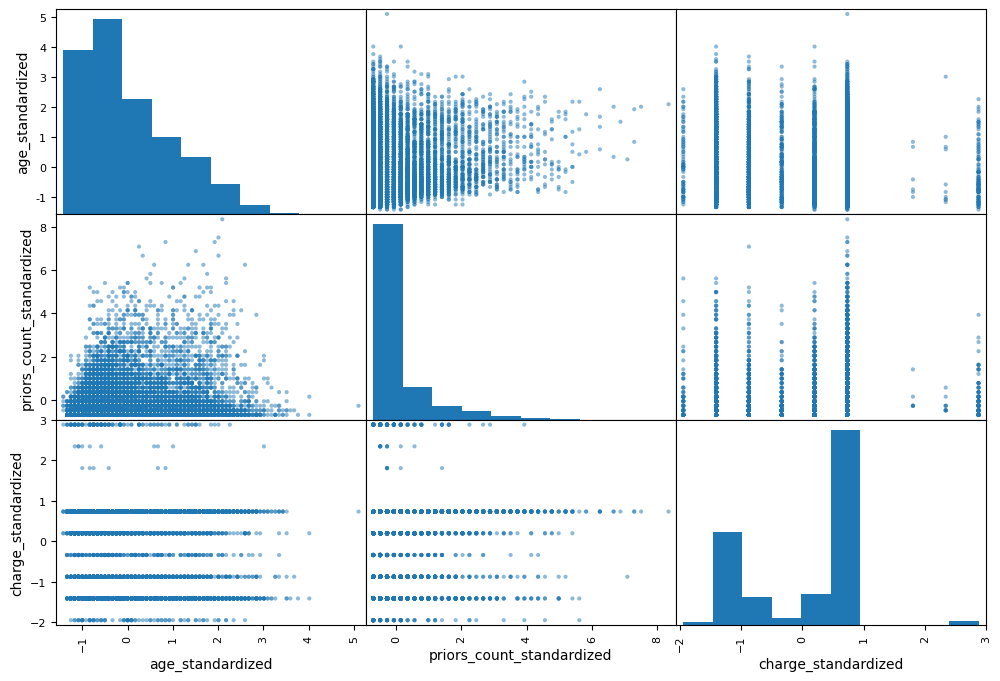

In [ ]:
scatter_matrix(df[['age_standardized','priors_count_standardized','charge_standardized']], figsize=(12, 8))

### Now that we have finishing cleaning and preprocessing our data, we will split our data into training and 2 test sets (is_recid and is_violent_recid). We will test various models to find the best performance.

# **Model 1: Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc

y = df['is_recid']
y_violent = df['is_violent_recid']
X = df.drop(['is_recid', 'is_violent_recid'], axis=1)

In [ ]:
# find best hyperparameter and regularization
best_log_model = None
best_acc = 0
best_c = 0.0
reg_type = ''

hyperparameters = [0.01, 0.1, 1, 10, 100]
penalties = ['l1', 'l2']
for c in hyperparameters:
  for p in penalties:
    model = LogisticRegression(solver='liblinear', C=c, penalty=p, random_state = 42)
    avg_score = cross_val_score(model, X, y, scoring='accuracy').mean()

    if avg_score > best_acc:
        best_log_model = model
        best_acc = avg_score
        best_c = c
        reg_type = p

print("===== Model for General Recidivism =====")
print("C = 1/𝜆")
print("Best C: ", best_c)
print("Best 𝜆: ", 1/best_c)
print("Best acc: ", best_acc)
print("Regularization type: ", reg_type)

===== Model for General Recidivism =====
C = 1/𝜆
Best C:  1
Best 𝜆:  1.0
Best acc:  0.6980373637876809
Regularization type:  l2


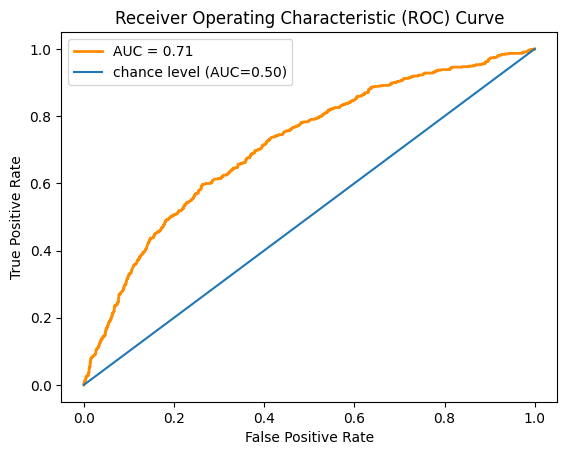

Precision:  0.6191950464396285
Recall:  0.2932551319648094
Accuracy:  0.7063106796116505


In [ ]:
# train and test with best hyperparams
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)
model = LogisticRegression(solver='liblinear', C=1, penalty='l2', random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# obtain metrics
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], label="chance level (AUC=0.50)")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# print stats
print("Precision: ", precision)
print("Recall: ", recall)
print("Accuracy: ", accuracy)

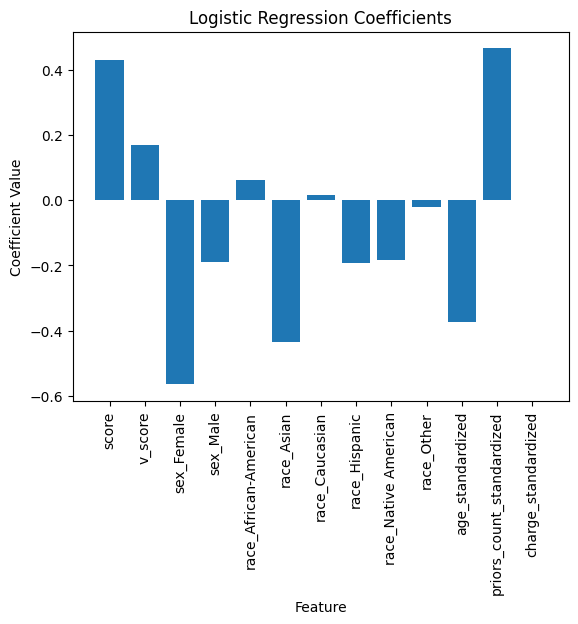

In [ ]:
# visualize coefficients since we have many features
plt.bar(range(X_test.shape[1]), model.coef_[0])
plt.xticks(range(X_test.shape[1]), X_test.columns, rotation='vertical')
plt.title('Logistic Regression Coefficients')
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.show()

In [ ]:
# repeat for violent recidivism
best_log_model = None
best_acc = 0
best_c = 0.0
reg_type = ''

hyperparameters = [0.01, 0.1, 1, 10, 100]
penalties = ['l1', 'l2']
for c in hyperparameters:
  for p in penalties:
    model = LogisticRegression(solver='liblinear', C=c, penalty=p, random_state = 42)
    avg_score = cross_val_score(model, X, y_violent, scoring='accuracy').mean()

    if avg_score > best_acc:
        best_log_model = model
        best_acc = avg_score
        best_c = c
        reg_type = p

print("===== Model for Violent Recidivism =====")
print("C = 1/𝜆")
print("Best C: ", best_c)
print("Best 𝜆: ", 1/best_c)
print("Best acc: ", best_acc)
print("Regularization type: ", reg_type)

===== Model for Violent Recidivism =====
C = 1/𝜆
Best C:  0.01
Best 𝜆:  100.0
Best acc:  0.9209401773884014
Regularization type:  l1


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


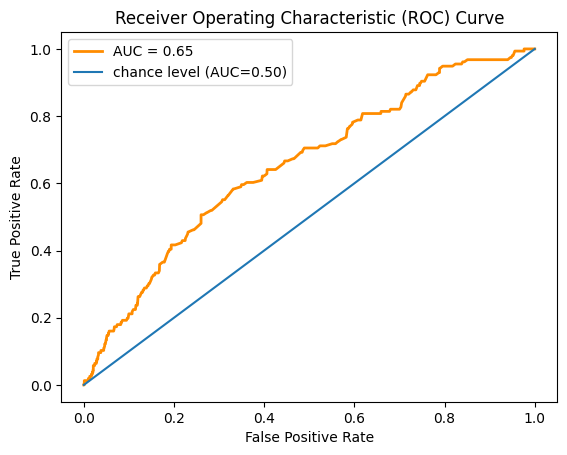

1904  , 0  , 156  , 0
Precision:  0.0
Recall:  0.0
Accuracy:  0.9242718446601942


In [ ]:
# train and test with best hyperparams
X_train, X_test, y_train, y_test = train_test_split(X,y_violent,test_size=0.2, random_state = 42)
model = LogisticRegression(solver='liblinear', C=0.01, penalty='l1', random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# obtain metrics
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], label="chance level (AUC=0.50)")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


conf_matrix = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = conf_matrix.ravel()
print(TN, " ,", FP, " ,", FN, " ,", TP)

# print stats
print("Precision: ", precision)
print("Recall: ", recall)
print("Accuracy: ", accuracy)

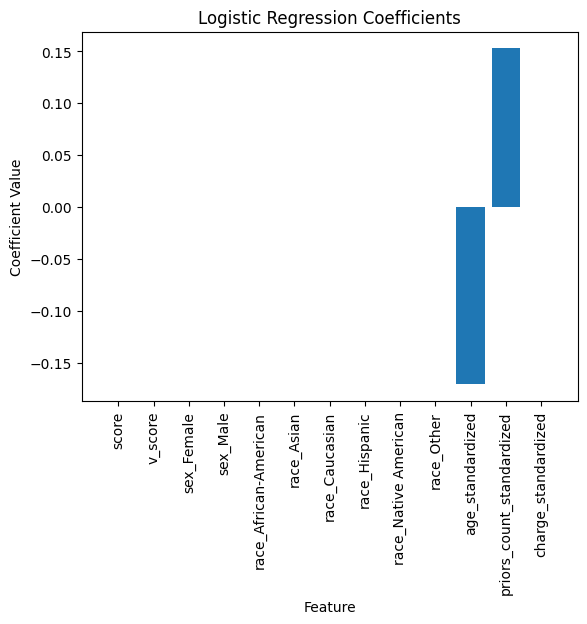

In [ ]:
# visualize coefficients since we have many features
plt.bar(range(X_test.shape[1]), model.coef_[0])
plt.xticks(range(X_test.shape[1]), X_test.columns, rotation='vertical')
plt.title('Logistic Regression Coefficients')
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.show()

## **Evaluation of Logistic Regression**

# **Model 2: Decision Tree**

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

y = df['is_recid']
y_violent = df['is_violent_recid']
X = df.drop(['is_recid', 'is_violent_recid'], axis=1)


In [ ]:
#for regular recidivism
best_acc = -np.inf
best_depth=0
best_feature=0
threshold_impurity = 0.001
best_criterion = ''

#find the best hyperparameters (depth and max features or min leaf nodes)
for h in ['gini', 'entropy']:
  for i in range(1,11): #test max depth of 10
    for j in range(1,14): #there are 13 total columns in train set
        model=DecisionTreeClassifier(max_depth=i, max_features = j, criterion=h, min_impurity_decrease=threshold_impurity, random_state = 42)
        accuracy = cross_val_score(estimator=model, X=X, y=y, scoring = "accuracy", cv=10).mean() #cross validate for the best parameters
        if accuracy > best_acc:
          best_acc = accuracy
          best_depth = i
          best_feature = j
          best_criterion = h
print(f"Decision Tree Accuracy for General Recidivism: {best_acc} \nBest Depth: {best_depth} \nMax Features: {best_feature} \nCriterion: {best_criterion}")

Decision Tree Accuracy for General Recidivism: 0.6987207865115532 
Best Depth: 5 
Max Features: 7 
Criterion: entropy


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

dt=DecisionTreeClassifier(criterion = best_criterion, max_depth=best_depth, max_features = best_feature, random_state = 42)
dt.fit(X_train, y_train)
y_pred=dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
dt.score(X_train, y_train), dt.score(X_test, y_test)

0.7072815533980582


(0.7034968431277319, 0.7072815533980582)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

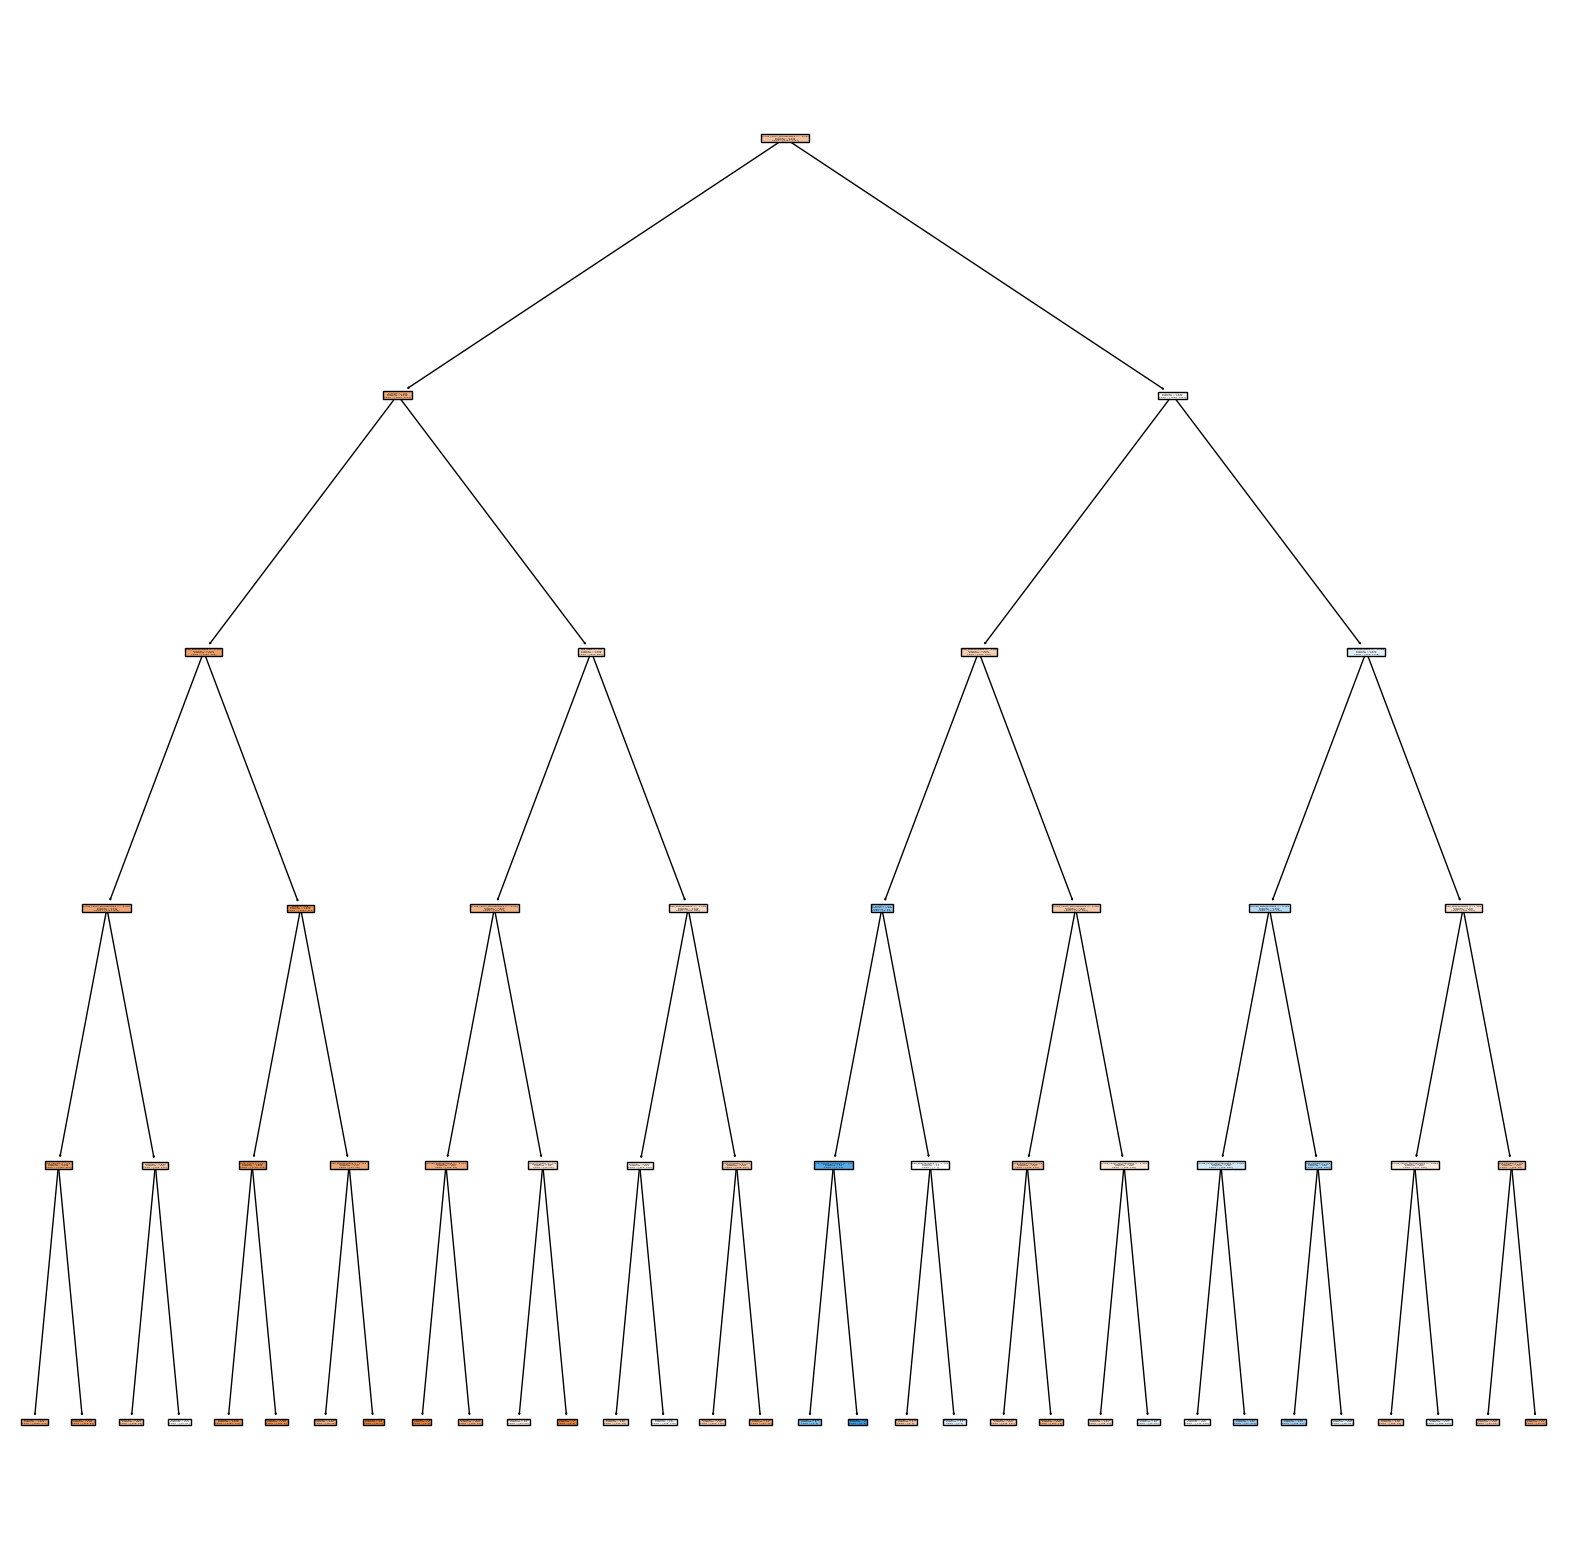

In [ ]:
fig,ax=plt.subplots(1, figsize = (20,20))
p=tree.plot_tree(dt, filled=True, feature_names=X.columns)
from google.colab import files
plt.savefig("p.png")
files.download("p.png")

In [ ]:
#repeat for violent recidivism

best_acc = -np.inf
best_depth=0
best_feature=0
threshold_impurity = 0.001
best_criterion = ''

#find the best hyperparameters (depth and max features or min leaf nodes)
for h in ['gini', 'entropy']:
  for i in range(1,11): #test max depth of 10
    for j in range(1,14): #there are 13 total columns in train set
        model=DecisionTreeClassifier(max_depth=i, max_features = j, criterion=h, min_impurity_decrease=threshold_impurity, random_state = 42)
        accuracy = cross_val_score(estimator=model, X=X, y=y_violent, scoring = "accuracy", cv=10).mean() #cross validate for the best parameters
        if accuracy > best_acc:
          best_acc = accuracy
          best_depth = i
          best_feature = j
          best_criterion = h
print(f"Decision Tree Accuracy for Violent Recidivism: {best_acc} \nBest Depth: {best_depth} \nMax Features: {best_feature} \nCriterion: {best_criterion}")

In [ ]:
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X,y_violent,test_size=0.2, random_state = 42)

dt_violent=DecisionTreeClassifier(criterion = best_criterion, max_depth=best_depth, max_features = best_feature, random_state = 42)
dt_violent.fit(X_train_v, y_train_v)
y_pred_violent=dt_violent.predict(X_test_v)
accuracy_violent = accuracy_score(y_test_v, y_pred_violent)
print(accuracy_violent)
dt_violent.score(X_train_v, y_train_v), dt_violent.score(X_test_v, y_test_v)

0.9242718446601942


(0.9201068479844585, 0.9242718446601942)

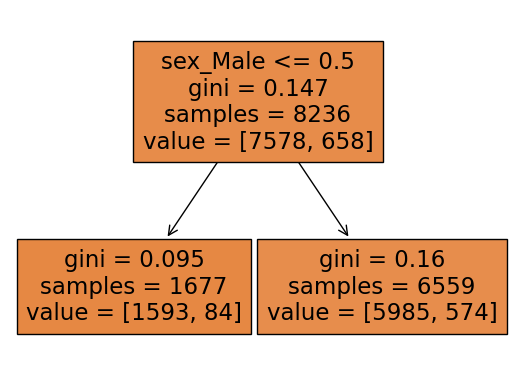

In [ ]:
fig,ax=plt.subplots(1)
p_violent=tree.plot_tree(dt_violent, filled=True, feature_names=X.columns)

## **Evaluation of Decision Tree**

In [ ]:
dt_confusion = confusion_matrix(y_test, dt.predict(X_test))

In [ ]:
print('precision: ', dt_confusion[1,1]/(dt_confusion[1,1]+dt_confusion[0,1]))
print('recall: ', dt_confusion[1,1]/(dt_confusion[1,1]+dt_confusion[1,0]))

precision:  0.5758157389635317
recall:  0.4398826979472141


TPR:  0.6392961876832844
FPR:  0.3570391872278665
AUC:  0.7048620126069913
threshold:  0.3561643835616438


Text(0.5, 0, 'False Positive Rate')

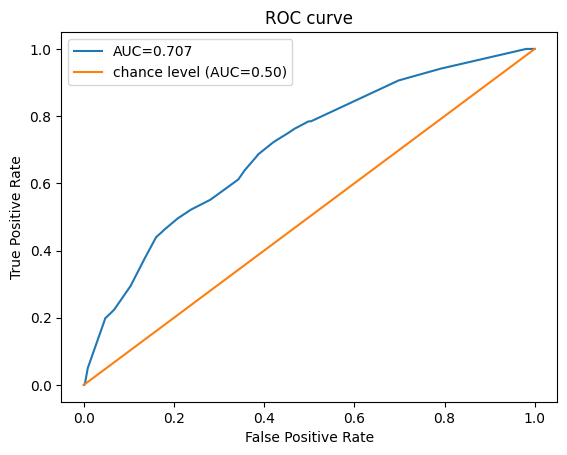

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(y_test, dt.predict_proba(X_test)[:, 1])
error = 1-tpr
idx = np.argmin(np.abs(error-fpr))
print("TPR: ", tpr[idx])
print("FPR: ", fpr[idx])

roc_auc = metrics.auc(fpr, tpr)
print("AUC: ", roc_auc)

print("threshold: ", thresholds[idx])

import matplotlib.pyplot as plt
plt.title('ROC curve')
plt.plot(fpr, tpr, label = "AUC=0.707")
plt.plot([0, 1], [0, 1], label="chance level (AUC=0.50)")
plt.legend()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
dt_v_confusion=confusion_matrix(y_test_v, dt_violent.predict(X_test_v))
dt_v_confusion

array([[1904,    0],
       [ 156,    0]])

In [ ]:
print('precision: ', dt_v_confusion[1,1]/(dt_v_confusion[1,1]+dt_v_confusion[0,1]))
print('recall: ', dt_v_confusion[1,1]/(dt_v_confusion[1,1]+dt_v_confusion[1,0]))

precision:  nan
recall:  0.0


<ipython-input-365-0ac9f7786444>:1: RuntimeWarning: invalid value encountered in long_scalars
  print('precision: ', dt_v_confusion[1,1]/(dt_v_confusion[1,1]+dt_v_confusion[0,1]))


TPR:  0.8653846153846154
FPR:  0.7841386554621849
AUC:  0.5406229799612152
threshold:  0.08751334044823907


Text(0.5, 0, 'False Positive Rate')

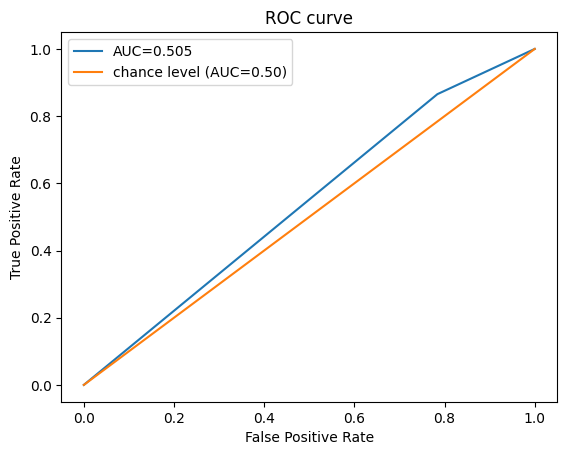

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(y_test_v,dt_violent.predict_proba(X_test_v)[:, 1])
error = 1-tpr
idx = np.argmin(np.abs(error-fpr))
print("TPR: ", tpr[idx])
print("FPR: ", fpr[idx])

roc_auc = metrics.auc(fpr, tpr)
print("AUC: ", roc_auc)

print("threshold: ", thresholds[idx])

import matplotlib.pyplot as plt
plt.title('ROC curve')
plt.plot(fpr, tpr, label = "AUC=0.505")
plt.plot([0, 1], [0, 1], label="chance level (AUC=0.50)")
plt.legend()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# **Model 3: K-Nearest Neighbors**

## **Evaluation of K-Nearest Neighbors**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score

# Range of k to try
k_values = range(1, 13)

# Store average scores for each k
average_scores_r = []
best_accuracy_score = 0
best_k_r = 0
average_scores=[]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # Using 5-fold cross-validation
    average_scores = np.mean(scores)
    average_scores_r.append(average_scores)

    if average_scores>best_accuracy_score:
      best_accuracy_score=average_scores
      best_k_r = k

# Finding the best k

print(f"Best k for violent recidivism: {best_k_r} with an average accuracy of {best_accuracy_score}")



Best k for violent recidivism: 12 with an average accuracy of 0.6749633048614426


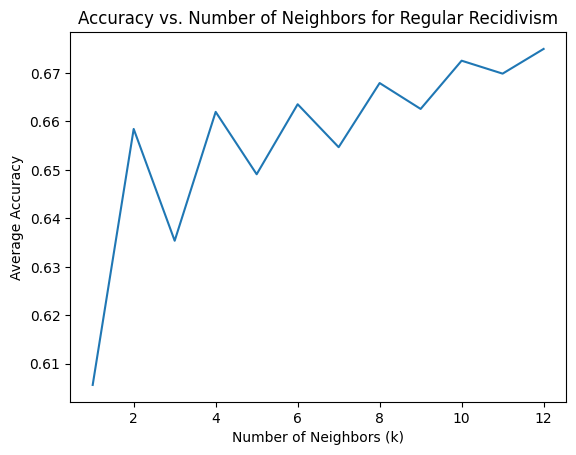

In [ ]:
k_values = list(k_values)

plt.plot(k_values, average_scores_r)


plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Average Accuracy')
plt.title('Accuracy vs. Number of Neighbors for Regular Recidivism')
plt.show()

In [ ]:
#for violent recidivism
# Splitting the dataset into training and testing sets
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X, y_violent, test_size=0.2, random_state=42)
average_scores_v = {}
k_values = range(1, 13) #there are 13 columns in training set
average_scores_v =[]

best_accuracy_score = 0
best_k_violent = 0

for k in k_values:

    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_v, y_train_v, cv=10, scoring='accuracy')  # Using 10-fold cross-validation
    average_scores = np.mean(scores)
    average_scores_v.append(average_scores)

    if average_scores>best_accuracy_score:
      best_accuracy_score=average_scores
      best_k_violent = k

# Finding the best k

print(f"Best k for violent recidivism: {best_k_violent} with an average accuracy of {best_accuracy_score}")



Best k for violent recidivism: 12 with an average accuracy of 0.9198641307553469


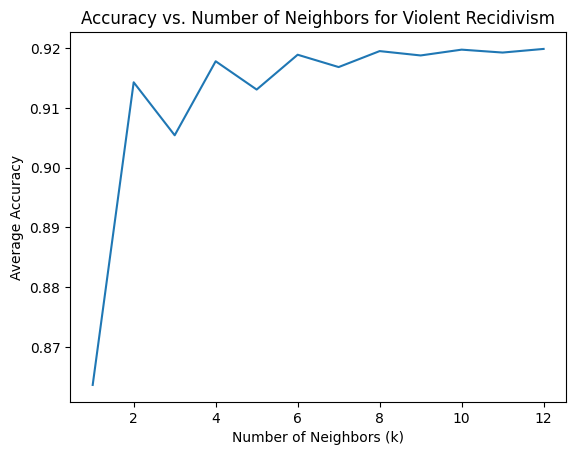

In [ ]:
import matplotlib.pyplot as plt

k_values = list(k_values)

plt.plot(k_values, average_scores_v)


plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Average Accuracy')
plt.title('Accuracy vs. Number of Neighbors for Violent Recidivism')
plt.show()


In [ ]:
#Confusion matrix regular recidivism
model_kNN = KNeighborsClassifier(n_neighbors = 12)
model_kNN.fit(X_train, y_train)
y_pred = model_kNN.predict(X_test)
kNN_confusion = confusion_matrix(y_test, y_pred)
print(kNN_confusion)

[[1214  164]
 [ 488  194]]


In [ ]:
#precision and recall regular recidivism

print('precision_kNN_regular_recidivism: ', kNN_confusion[1,1]/(kNN_confusion[1,1]+kNN_confusion[0,1]))
print('recall_kNN_regular_recidivism: ', kNN_confusion[1,1]/(kNN_confusion[1,1]+kNN_confusion[1,0]))

precision_kNN_regular_recidivism:  0.5418994413407822
recall_kNN_regular_recidivism:  0.2844574780058651


TPR:  0.5777126099706745
FPR:  0.3178519593613933
AUC for kNN model:  0.6801252612269045
threshold for kNN model:  0.4166666666666667


Text(0.5, 0, 'False Positive Rate')

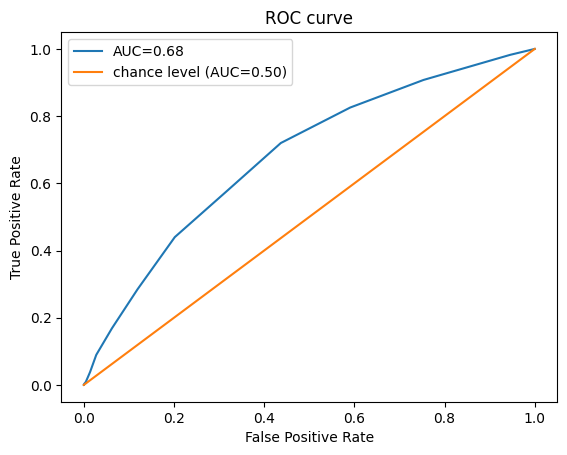

In [ ]:
from sklearn import metrics

fpr_knn, tpr_knn, thresholds_knn = metrics.roc_curve(y_test, model_kNN.predict_proba(X_test)[:, 1])

error = 1-tpr_knn
idx = np.argmin(np.abs(error-fpr_knn))
print("TPR: ", tpr_knn[idx])
print("FPR: ", fpr_knn[idx])

roc_auc_knn = metrics.auc(fpr_knn, tpr_knn)
print("AUC for kNN model: ", roc_auc_knn)

print("threshold for kNN model: ", thresholds_knn[idx])

import matplotlib.pyplot as plt
plt.title('ROC curve')
plt.plot(fpr_knn, tpr_knn, label = "AUC=0.68")
plt.plot([0, 1], [0, 1], label="chance level (AUC=0.50)")
plt.legend()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
#Confusion matrix violent recidivism
model_kNN_v = KNeighborsClassifier(n_neighbors = 12)
model_kNN_v.fit(X_train_v, y_train_v)
y_pred_v = model_kNN_v.predict(X_test_v)
kNN_confusion_v = confusion_matrix(y_test_v, y_pred_v)
print(kNN_confusion_v)

[[1902    2]
 [ 155    1]]


In [ ]:
#precision and recall violent recidivism

print('precision_kNN_violent_recidivism: ', kNN_confusion_v[1,1]/(kNN_confusion_v[1,1]+kNN_confusion_v[0,1]))
print('recall_kNN_violent_recidivism: ', kNN_confusion_v[1,1]/(kNN_confusion_v[1,1]+kNN_confusion_v[1,0]))

precision_kNN_violent_recidivism:  0.3333333333333333
recall_kNN_violent_recidivism:  0.00641025641025641


TPR:  0.7051282051282052
FPR:  0.571953781512605
AUC for kNN model:  0.6046918767507004
threshold for kNN model:  0.08333333333333333


Text(0.5, 0, 'False Positive Rate')

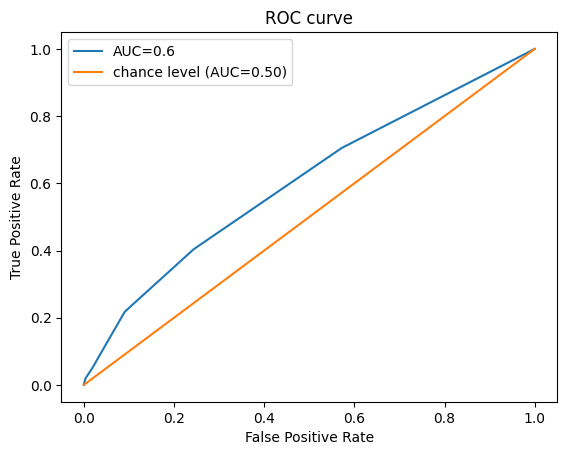

In [ ]:
fpr_knn_v, tpr_knn_v, thresholds_knn_v = metrics.roc_curve(y_test_v, model_kNN_v.predict_proba(X_test_v)[:, 1])

error_v = 1-tpr_knn_v
idx = np.argmin(np.abs(error_v-fpr_knn_v))
print("TPR: ", tpr_knn_v[idx])
print("FPR: ", fpr_knn_v[idx])

roc_auc_knn_v = metrics.auc(fpr_knn_v, tpr_knn_v)
print("AUC for kNN model: ", roc_auc_knn_v)

print("threshold for kNN model: ", thresholds_knn_v[idx])

import matplotlib.pyplot as plt
plt.title('ROC curve')
plt.plot(fpr_knn_v, tpr_knn_v, label = "AUC=0.6")
plt.plot([0, 1], [0, 1], label="chance level (AUC=0.50)")
plt.legend()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# **Model 4: Neural Network**

In [ ]:
from sklearn.model_selection import train_test_split
import torch

y = df['is_recid']
y_violent = df['is_violent_recid']
X = df.drop(['is_recid', 'is_violent_recid'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X,y_violent,test_size=0.2, random_state = 42)

In [ ]:
# Neural network design
# 13 features -> n_neurons neurons in HL1 -> 1 output
class RecidClassifier(torch.nn.Module):
  def __init__(self):
    super(RecidClassifier, self).__init__()

    # Layers
    self.fc1 = torch.nn.Linear(13, 32)
    self.relu1 = torch.nn.ReLU()
    self.dropout1 = torch.nn.Dropout(p=0.5)
    self.output = torch.nn.Linear(32, 1)
    self.sigmoid = torch.nn.Sigmoid()

  def forward(self, x):
    x = self.fc1(x)
    x = self.relu1(x)
    x = self.dropout1(x)
    x = self.output(x)
    x = self.sigmoid(x)
    return x

In [ ]:
# Create Datasets
class Data(torch.utils.data.Dataset):
  def __init__(self, X_train, y_train):
    self.X = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
    self.y = torch.tensor(y_train.to_numpy(), dtype=torch.float32).reshape(-1, 1)
    self.len = self.X.shape[0]

  def __getitem__(self, index):
    return self.X[index], self.y[index]

  def __len__(self):
    return self.len

training_data = Data(X_train, y_train)
test_data = Data(X_test, y_test)

training_data_v = Data(X_train_v, y_train_v)
test_data_v = Data(X_test_v, y_test_v)

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
  model.train()
  for epoch in range(20):
    for (X, y) in dataloader:
      pred = model(X)
      loss = loss_fn(pred, y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

In [ ]:
def test_loop_pred(dataloader, model, loss_fn, threshold=0.5):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss, correct = 0, 0

  model.eval()

  predictions = []
  probs = []
  with torch.no_grad():
    for X, y in dataloader:
      pred = model(X)
      pred_np = (pred >= threshold).float().numpy()
      probs_np = pred.float().numpy()

      predictions = np.concatenate((predictions, np.reshape(pred_np, (1, -1))[0]), axis=0)
      probs = np.concatenate((probs, np.reshape(probs_np, (1, -1))[0]), axis=0)

      test_loss += loss_fn(pred, y).item()
      correct += ((pred >= threshold).float() == y.float()).sum().item()

  test_loss /= num_batches
  correct /= size
  #print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, \n Average loss: {test_loss:>8f} \n")
  return correct, predictions, probs

In [ ]:
# RECIDIVISM
torch.manual_seed(42)

# Initialize, train and test the model
learning_rates = [0.1, 0.001, 0.0001]
batch_sizes = [100, 200, 300]

best_acc = -np.inf
best_learning_rate = 0
best_batch_size = 0
best_preds = []
best_probs = []

# Optimize hyperparameters
for learning_rate in learning_rates:
  for batch_size in batch_sizes:
    # train
    model = RecidClassifier()
    loss_fn = torch.nn.BCELoss()
    train_dataloader = torch.utils.data.DataLoader(training_data, batch_size = batch_size)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.001)
    train_loop(train_dataloader, model, loss_fn, optimizer)

    # test
    test_dataloader = torch.utils.data.DataLoader(test_data, batch_size = batch_size)
    accuracy, pred, probs = test_loop_pred(test_dataloader, model, loss_fn, 0.5)

    if accuracy > best_acc:
      best_acc = accuracy
      best_learning_rate = learning_rate
      best_batch_size = batch_size
      best_preds = pred
      best_probs = probs

print("Neural Network for Predicting Recidivism")
print(f"Best accuracy: {(100*best_acc):>0.1f}%")
print("with learning rate " + str(best_learning_rate) + " and batch size " + str(best_batch_size))

Neural Network for Predicting Recidivism
Best accuracy: 71.3%
with learning rate 0.001 and batch size 300


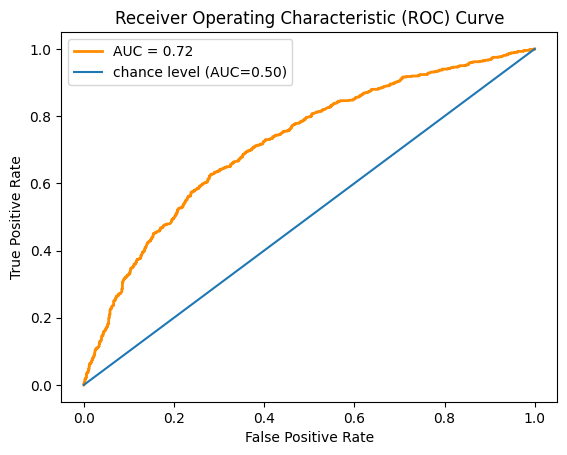

Precision:  0.6085918854415274
Recall:  0.37390029325513197
Accuracy:  0.7131067961165048


In [ ]:
# plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, best_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], label="chance level (AUC=0.50)")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# obtain metrics
precision = precision_score(y_test, best_preds)
recall = recall_score(y_test, best_preds)
accuracy = accuracy_score(y_test, best_preds)

print("Precision: ", precision)
print("Recall: ", recall)
print("Accuracy: ", accuracy)

In [ ]:
# VIOLENT RECIDIVISM
torch.manual_seed(42)

# Initialize, train and test the model
learning_rates = [0.1, 0.001, 0.0001]
batch_sizes = [100, 200, 300]

best_acc = -np.inf
best_learning_rate = 0
best_batch_size = 0
best_preds = []
best_probs = []

# Optimize hyperparameters
for learning_rate in learning_rates:
  for batch_size in batch_sizes:
    # train
    model = RecidClassifier()
    loss_fn = torch.nn.BCELoss()
    train_dataloader = torch.utils.data.DataLoader(training_data_v, batch_size = batch_size)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.001)
    train_loop(train_dataloader, model, loss_fn, optimizer)

    # test
    test_dataloader = torch.utils.data.DataLoader(test_data_v, batch_size = batch_size)
    accuracy, pred, probs = test_loop_pred(test_dataloader, model, loss_fn)

    if accuracy > best_acc:
      best_acc = accuracy
      best_learning_rate = learning_rate
      best_batch_size = batch_size
      best_preds = pred
      best_probs = probs

print("Neural Network for Predicting Violent Recidivism")
print(f"Best accuracy: {(100*best_acc):>0.1f}%")
print("with learning rate " + str(best_learning_rate) + " and batch size " + str(best_batch_size))

Neural Network for Predicting Violent Recidivism
Best accuracy: 92.4%
with learning rate 0.1 and batch size 100


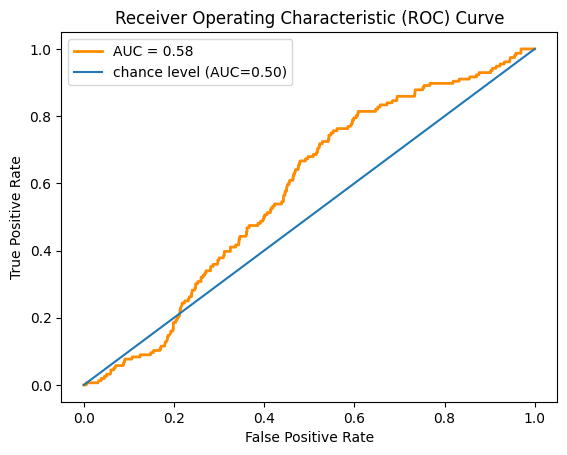

Precision:  0.0
Recall:  0.0
Accuracy:  0.9242718446601942


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test_v, best_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], label="chance level (AUC=0.50)")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# obtain metrics
precision = precision_score(y_test_v, best_preds)
recall = recall_score(y_test_v, best_preds)
accuracy = accuracy_score(y_test_v, best_preds)

print("Precision: ", precision)
print("Recall: ", recall)
print("Accuracy: ", accuracy)

# **MAIN MODEL**

In [ ]:
# Separate data according to races
afam_df = df[df['race_African-American'] == 1]
cauc_df = df[df['race_Caucasian'] == 1]
asian_df = df[df['race_Asian'] == 1]
hispanic_df = df[df['race_Hispanic'] == 1]
na_df = df[df['race_Native American'] == 1]
other_df = df[df['race_Other'] == 1]

In [ ]:
y_afam = afam_df['is_recid']
y_violent_afam = afam_df['is_violent_recid']
X_afam_test = afam_df.drop(['is_recid', 'is_violent_recid'], axis=1)

y_cauc = cauc_df['is_recid']
y_violent_cauc = cauc_df['is_violent_recid']
X_cauc_test = cauc_df.drop(['is_recid', 'is_violent_recid'], axis=1)

y_asian = asian_df['is_recid']
y_violent_asian = asian_df['is_violent_recid']
X_asian_test = asian_df.drop(['is_recid', 'is_violent_recid'], axis=1)

y_hispanic = hispanic_df['is_recid']
y_violent_hispanic = hispanic_df['is_violent_recid']
X_hispanic_test = hispanic_df.drop(['is_recid', 'is_violent_recid'], axis=1)

y_na = na_df['is_recid']
y_violent_na= na_df['is_violent_recid']
X_na_test = na_df.drop(['is_recid', 'is_violent_recid'], axis=1)

y_other = other_df['is_recid']
y_violent_other = other_df['is_violent_recid']
X_other_test = other_df.drop(['is_recid', 'is_violent_recid'], axis=1)

batch_size = 300

test_data_afam = Data(X_afam_test, y_afam)
test_dataloader_afam = torch.utils.data.DataLoader(test_data_afam, batch_size = batch_size)

test_data_cauc = Data(X_cauc_test, y_cauc)
test_dataloader_cauc = torch.utils.data.DataLoader(test_data_cauc, batch_size = batch_size)

test_data_asian = Data(X_asian_test, y_asian)
test_dataloader_asian = torch.utils.data.DataLoader(test_data_asian, batch_size = batch_size)

test_data_hispanic = Data(X_hispanic_test, y_hispanic)
test_dataloader_hispanic = torch.utils.data.DataLoader(test_data_hispanic, batch_size = batch_size)

test_data_na = Data(X_na_test, y_na)
test_dataloader_na = torch.utils.data.DataLoader(test_data_na, batch_size = batch_size)

test_data_other = Data(X_other_test, y_other)
test_dataloader_other = torch.utils.data.DataLoader(test_data_other, batch_size = batch_size)

In [ ]:
def test_loop_pred(dataloader, model, loss_fn, threshold=0.5):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss, correct = 0, 0

  model.eval()

  predictions = []
  probs = []
  with torch.no_grad():
    for X, y in dataloader:
      pred = model(X)
      pred_np = (pred >= threshold).float().numpy()
      probs_np = pred.float().numpy()

      predictions = np.concatenate((predictions, np.reshape(pred_np, (1, -1))[0]), axis=0)
      probs = np.concatenate((probs, np.reshape(probs_np, (1, -1))[0]), axis=0)

      test_loss += loss_fn(pred, y).item()
      correct += ((pred >= threshold).float() == y.float()).sum().item()

  test_loss /= num_batches
  correct /= size
  #print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, \n Average loss: {test_loss:>8f} \n")
  return correct, predictions, probs

In [ ]:
from sklearn.metrics import confusion_matrix

torch.manual_seed(42)


y = df['is_recid']
y_violent = df['is_violent_recid']
X = df.drop(['is_recid', 'is_violent_recid'], axis=1)

# x_recid = df[df['is_recid'] == 1]
# y_violent = x_recid['is_violent_recid']
# x_recid = x_recid.drop(['is_recid', 'is_violent_recid'], axis=1)

training_data = Data(X,y)
learning_rate = 0.001

# train
model = RecidClassifier()
loss_fn = torch.nn.BCELoss()
train_dataloader = torch.utils.data.DataLoader(training_data, batch_size = 300)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.001)
train_loop(train_dataloader, model, loss_fn, optimizer)
accuracy, pred, probs = test_loop_pred(train_dataloader, model, loss_fn, .5)

In [ ]:
import seaborn as sns

def generate_stats(y, pred):
  cm = confusion_matrix(y, pred)
  tn, fp, fn, tp = cm.ravel()
  print("True Negative:",tn)
  print("False Positive:",fp)
  print("False Negative:",fn)
  print("True Positve:",tp)

  sns.heatmap(cm, annot=True, annot_kws={"size": 24}, fmt='d', cmap='Blues', cbar=False,
              xticklabels=['Predicted No Recid', 'Predicted Recid'],
              yticklabels=['Actual No Recid', 'Actual Recid'])

  # print stats
  precision = precision_score(y, pred)
  recall = recall_score(y, pred)
  accuracy = accuracy_score(y, pred)
  print("Precision: ", precision)
  print("Recall: ", recall)
  print("Accuracy: ", accuracy)
  print("False Positive Rate:", (fp/(fp+tn)*100), "%")

True Negative: 2514
False Positive: 597
False Negative: 1097
True Positve: 931
Precision:  0.6092931937172775
Recall:  0.45907297830374755
Accuracy:  0.6703638840241292
False Positive Rate: 19.18997107039537 %


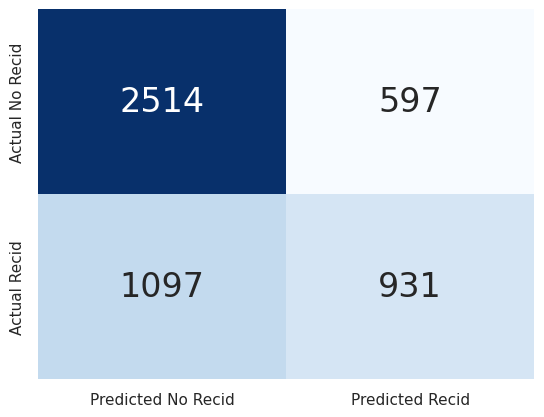

In [ ]:
accuracy, pred, probs = test_loop_pred(test_dataloader_afam, model, loss_fn)
generate_stats(y_afam, pred)

True Negative: 2409
False Positive: 140
False Negative: 828
True Positve: 190
Precision:  0.5757575757575758
Recall:  0.18664047151277013
Accuracy:  0.728623493131483
False Positive Rate: 5.492349941153393 %


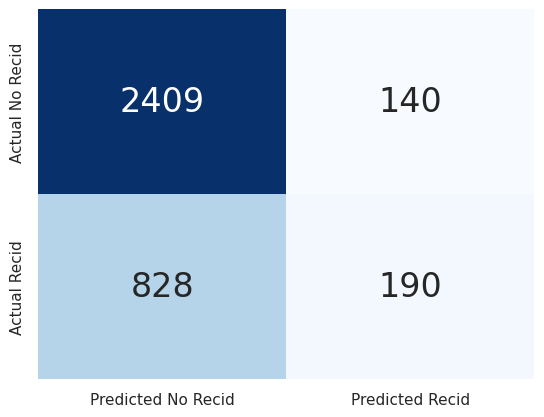

In [ ]:
accuracy, pred, probs = test_loop_pred(test_dataloader_cauc, model, loss_fn)
generate_stats(y_cauc, pred)

True Negative: 661
False Positive: 36
False Negative: 200
True Positve: 40
Precision:  0.5263157894736842
Recall:  0.16666666666666666
Accuracy:  0.7481323372465315
False Positive Rate: 5.164992826398852 %


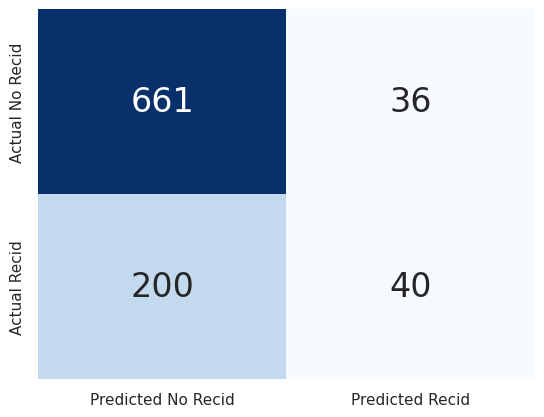

In [ ]:
accuracy, pred, probs = test_loop_pred(test_dataloader_hispanic, model, loss_fn)
generate_stats(y_hispanic, pred)

True Negative: 40
False Positive: 0
False Negative: 8
True Positve: 3
Precision:  1.0
Recall:  0.2727272727272727
Accuracy:  0.8431372549019608
False Positive Rate: 0.0 %


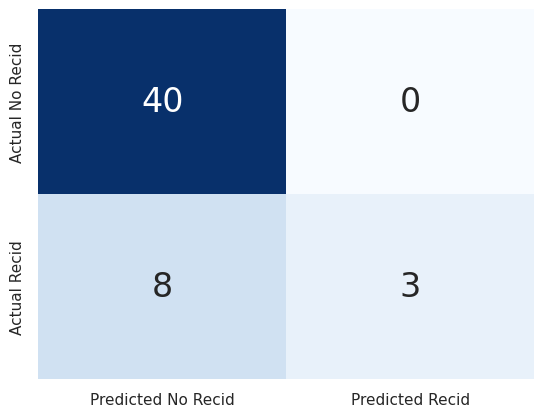

In [ ]:
accuracy, pred, probs = test_loop_pred(test_dataloader_asian, model, loss_fn)
generate_stats(y_asian, pred)

True Negative: 20
False Positive: 1
False Negative: 4
True Positve: 6
Precision:  0.8571428571428571
Recall:  0.6
Accuracy:  0.8387096774193549
False Positive Rate: 4.761904761904762 %


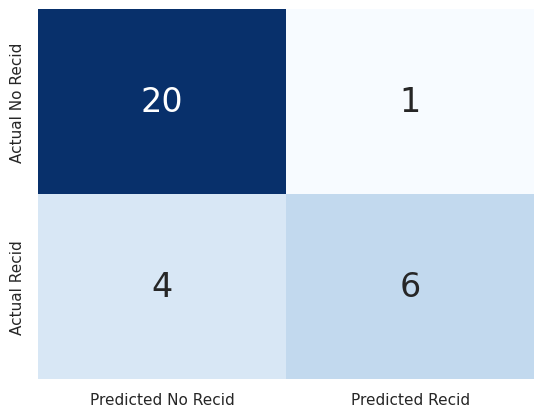

In [ ]:
accuracy, pred, probs = test_loop_pred(test_dataloader_na, model, loss_fn)
generate_stats(y_na, pred)

True Negative: 415
False Positive: 14
False Negative: 125
True Positve: 17
Precision:  0.5483870967741935
Recall:  0.11971830985915492
Accuracy:  0.7565674255691769
False Positive Rate: 3.263403263403263 %


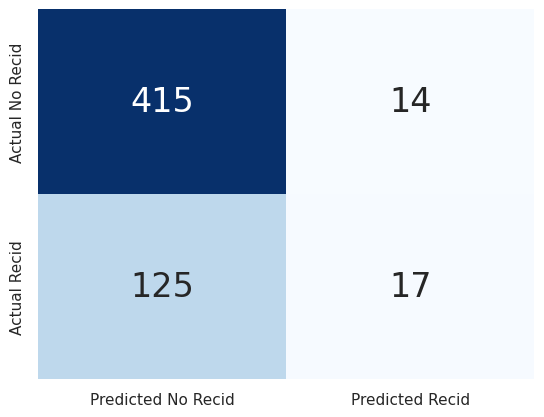

In [ ]:
accuracy, pred, probs = test_loop_pred(test_dataloader_other, model, loss_fn)
generate_stats(y_other, pred)

In [ ]:
batch_size = 100

test_data_v_afam = Data(X_afam_test, y_violent_afam)
test_dataloader_afam_v = torch.utils.data.DataLoader(test_data_v_afam, batch_size = batch_size)

test_data_v_cauc = Data(X_cauc_test, y_violent_cauc)
test_dataloader_cauc_v = torch.utils.data.DataLoader(test_data_v_cauc, batch_size = batch_size)

test_data_v_asian = Data(X_asian_test, y_violent_asian)
test_dataloader_asian_v = torch.utils.data.DataLoader(test_data_v_asian, batch_size = batch_size)

test_data_v_hispanic = Data(X_hispanic_test, y_violent_hispanic)
test_dataloader_hispanic_v = torch.utils.data.DataLoader(test_data_v_hispanic, batch_size = batch_size)

test_data_v_na = Data(X_na_test, y_violent_na)
test_dataloader_na_v = torch.utils.data.DataLoader(test_data_v_na, batch_size = batch_size)

test_data_v_other = Data(X_other_test, y_violent_other)
test_dataloader_other_v = torch.utils.data.DataLoader(test_data_v_other, batch_size = batch_size)

In [ ]:
# new model for violent data
training_data_v = Data(X,y_violent)
learning_rate = 0.1

torch.manual_seed(42)

# train
model_v = RecidClassifier()
loss_fn = torch.nn.BCELoss()
train_dataloader_v = torch.utils.data.DataLoader(training_data_v, batch_size=100)
optimizer = torch.optim.Adam(model_v.parameters(), lr=learning_rate, weight_decay=0.001)
train_loop(train_dataloader_v, model_v, loss_fn, optimizer)
# accuracy, pred, probs = test_loop_pred(train_dataloader_v, model_v, loss_fn, .5)

# find a decent threshold to obtain interpretable data for violent recidivism
ts = []
accs = []
for i in range(21):
  thresh = round((0 + (i*0.01)), 3)
  accuracy, pred, probs = test_loop_pred(train_dataloader_v, model_v, loss_fn, thresh)
  cm = confusion_matrix(y, pred)
  tn, fp, fn, tp = cm.ravel()
  print(thresh, ": acc ", accuracy, " with tn, fp, fn, tp ", tn, fp, fn, tp)

# we notice our accuracy minimum and maximum are at thresh = 0.0 and thresh = 0.17
# the accuracy does not increase linearly, we will choose thresh = 0.1

0.0 : acc  0.07905982905982906  with tn, fp, fn, tp  0 6847 0 3449
0.01 : acc  0.07905982905982906  with tn, fp, fn, tp  0 6847 0 3449
0.02 : acc  0.08129370629370629  with tn, fp, fn, tp  20 6827 3 3446
0.03 : acc  0.09663947163947163  with tn, fp, fn, tp  164 6683 21 3428
0.04 : acc  0.12946775446775446  with tn, fp, fn, tp  480 6367 71 3378
0.05 : acc  0.17414529914529914  with tn, fp, fn, tp  885 5962 166 3283
0.06 : acc  0.22542735042735043  with tn, fp, fn, tp  1350 5497 267 3182
0.07 : acc  0.2772921522921523  with tn, fp, fn, tp  1809 5038 398 3051
0.08 : acc  0.34382284382284384  with tn, fp, fn, tp  2357 4490 595 2854
0.09 : acc  0.4391996891996892  with tn, fp, fn, tp  3138 3709 944 2505
0.1 : acc  0.5603146853146853  with tn, fp, fn, tp  4104 2743 1441 2008
0.11 : acc  0.7065850815850816  with tn, fp, fn, tp  5234 1613 2219 1230
0.12 : acc  0.9091880341880342  with tn, fp, fn, tp  6743 104 3412 37
0.13 : acc  0.9158896658896659  with tn, fp, fn, tp  6803 44 3431 18
0.14 : a

True Negative: 1423
False Positive: 3222
False Negative: 79
True Positve: 415
Precision:  0.1141050316194666
Recall:  0.840080971659919
Accuracy:  0.35765713173769215
False Positive Rate: 69.3649085037675 %


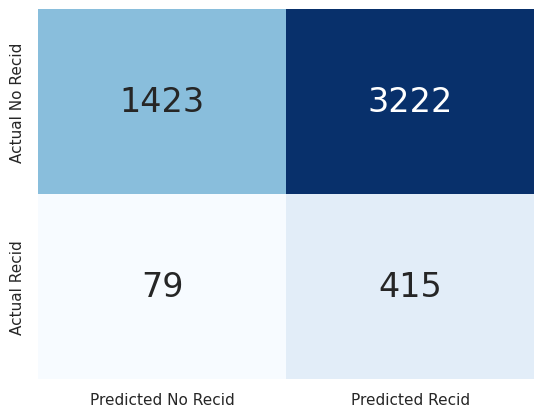

In [ ]:
accuracy, pred, probs = test_loop_pred(test_dataloader_afam_v, model_v, loss_fn, .1)
generate_stats(y_violent_afam, pred)

True Negative: 3202
False Positive: 145
False Negative: 194
True Positve: 26
Precision:  0.15204678362573099
Recall:  0.11818181818181818
Accuracy:  0.9049621530698065
False Positive Rate: 4.332237824917836 %


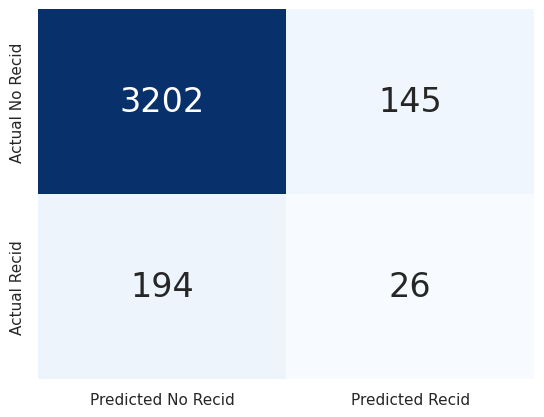

In [ ]:
accuracy, pred, probs = test_loop_pred(test_dataloader_cauc_v, model_v, loss_fn, .1)
generate_stats(y_violent_cauc, pred)

True Negative: 339
False Positive: 544
False Negative: 13
True Positve: 41
Precision:  0.07008547008547009
Recall:  0.7592592592592593
Accuracy:  0.4055496264674493
False Positive Rate: 61.60815402038505 %


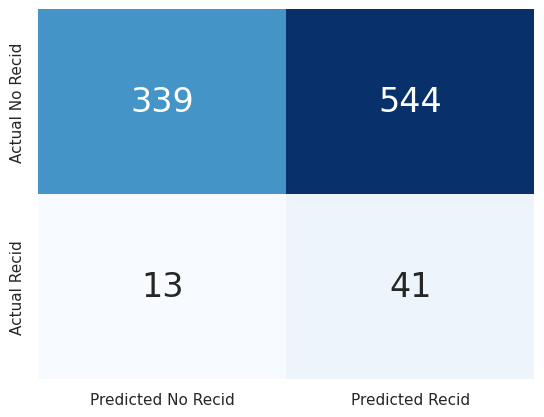

In [ ]:
accuracy, pred, probs = test_loop_pred(test_dataloader_hispanic_v, model_v, loss_fn, 0.1)
generate_stats(y_violent_hispanic, pred)

True Negative: 31
False Positive: 16
False Negative: 0
True Positve: 4
Precision:  0.2
Recall:  1.0
Accuracy:  0.6862745098039216
False Positive Rate: 34.04255319148936 %


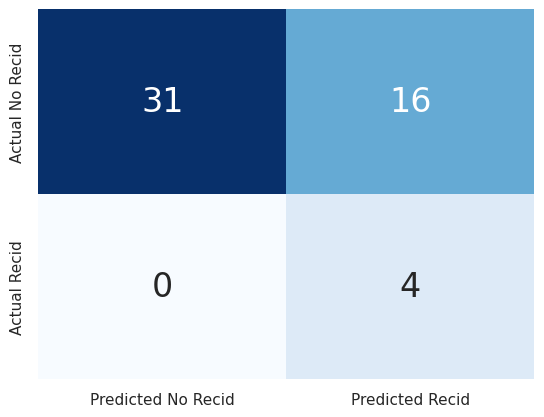

In [ ]:
accuracy, pred, probs = test_loop_pred(test_dataloader_asian_v, model_v, loss_fn, 0.1)
generate_stats(y_violent_asian, pred)

True Negative: 15
False Positive: 12
False Negative: 1
True Positve: 3
Precision:  0.2
Recall:  0.75
Accuracy:  0.5806451612903226
False Positive Rate: 44.44444444444444 %


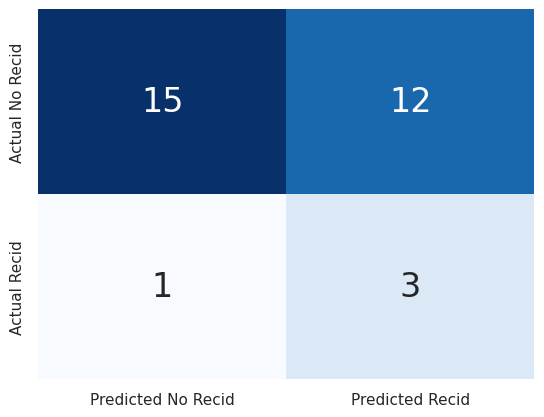

In [ ]:
accuracy, pred, probs = test_loop_pred(test_dataloader_na_v, model_v, loss_fn, 0.1)
generate_stats(y_violent_na, pred)

True Negative: 240
False Positive: 293
False Negative: 8
True Positve: 30
Precision:  0.09287925696594428
Recall:  0.7894736842105263
Accuracy:  0.47285464098073554
False Positive Rate: 54.971857410881796 %


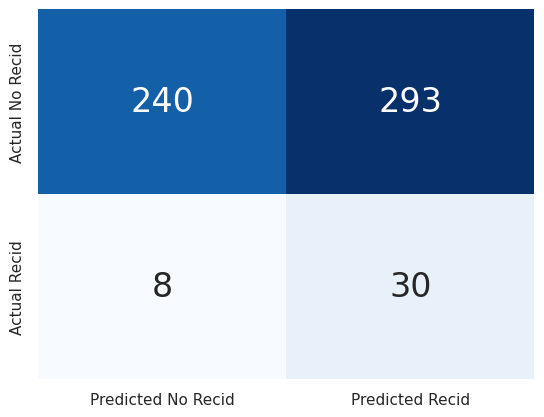

In [ ]:
accuracy, pred, probs = test_loop_pred(test_dataloader_other_v, model_v, loss_fn, 0.1)
generate_stats(y_violent_other, pred)

In [ ]:
test = df[df['is_violent_recid'] == 1]
print(len(test))
print(len(df))

814
10296
